In [1]:
!pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Sai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Load 3 MP3 files
sample_num = 2
file1 = f'acapella_{sample_num}.mp3'
file2 = f'with_backing_{sample_num}.mp3'
file3 = f'extracted_vocals_{sample_num}.mp3'

In [3]:
# Function to load audio file and generate chroma
def get_chroma(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Calculate spectrogram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma, sr

def pad_chroma(chroma1, chroma2):
    # Pad the smaller spectrogram to match the size of the larger one
    max_width = max(chroma1.shape[1], chroma2.shape[1])
    chroma1 = np.pad(chroma1, ((0, 0), (0, max_width - chroma1.shape[1])), mode='constant')
    chroma2 = np.pad(chroma2, ((0, 0), (0, max_width - chroma2.shape[1])), mode='constant')
    return chroma1, chroma2

In [4]:
# Generate chromas
chroma1, sr1 = get_chroma(file1)
chroma2, sr2 = get_chroma(file2)
chroma3, sr3 = get_chroma(file3)

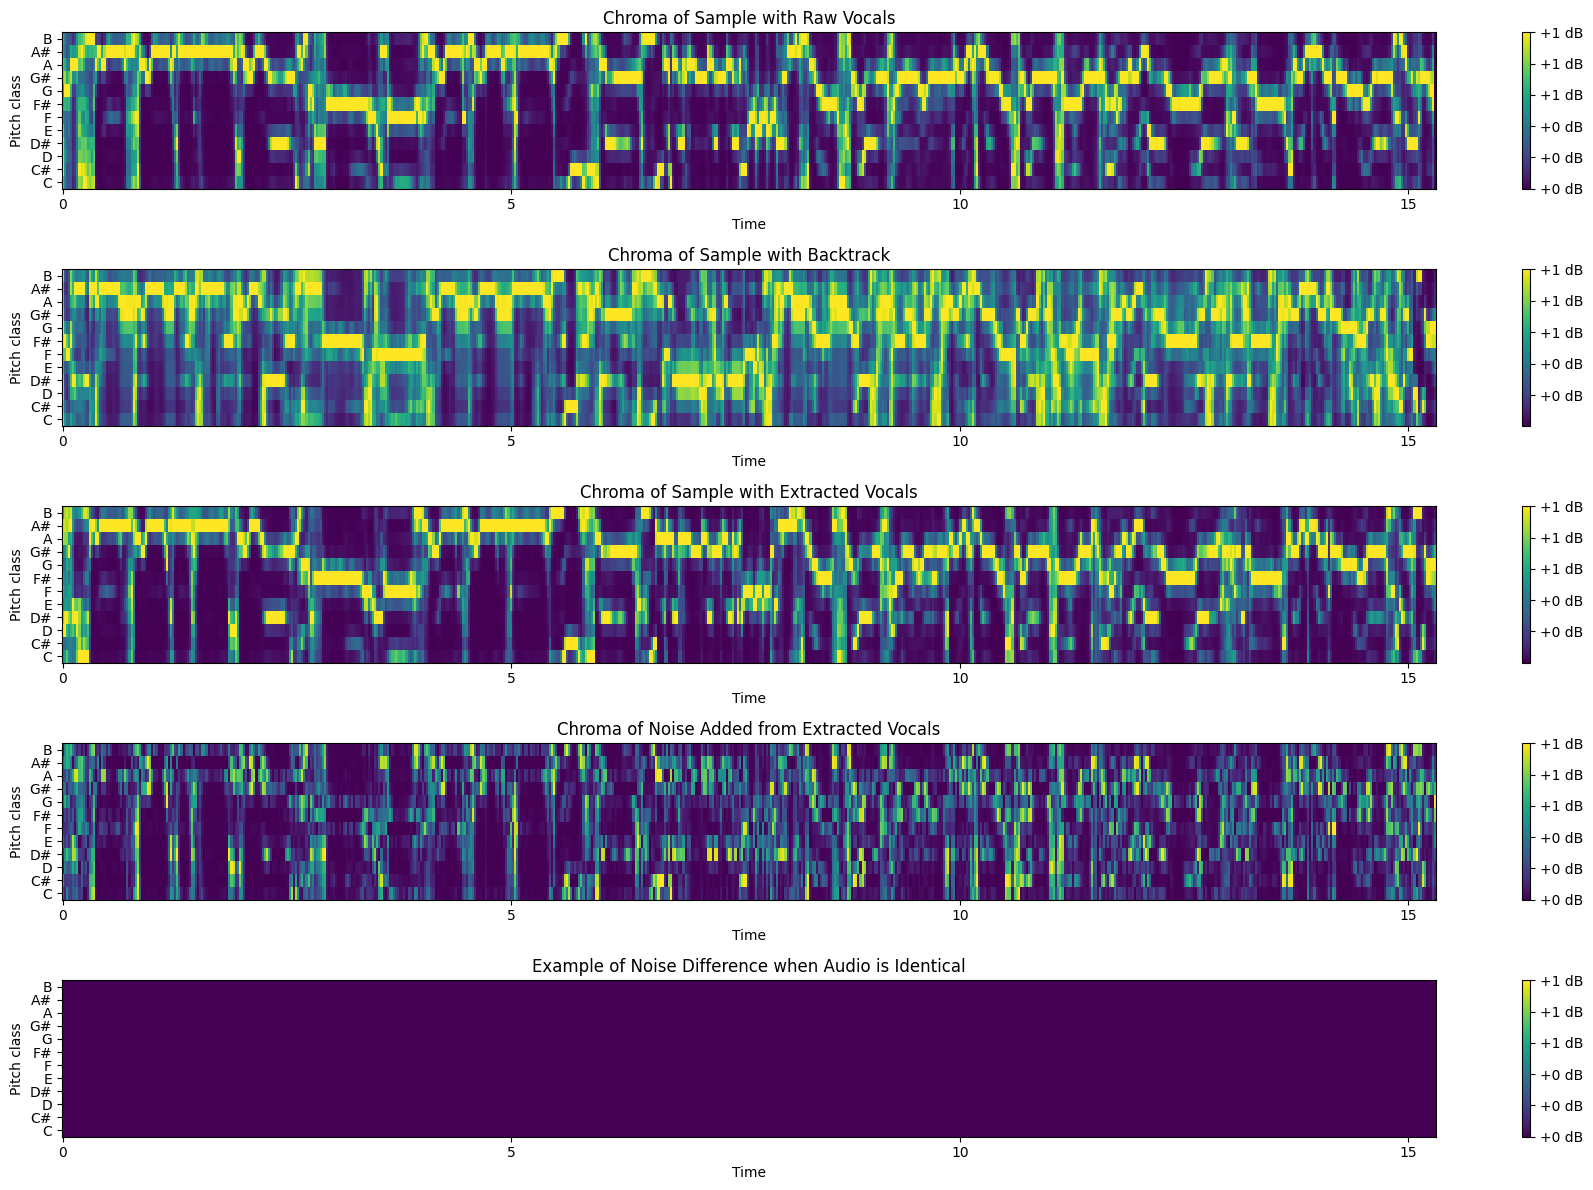

: 

In [16]:
pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
cmap = 'viridis'

# Plot chroma
plt.figure(figsize=(18, 12))

# Plot chroma 1
plt.subplot(5, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time', sr=sr1, cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.yticks(np.arange(12), pitch_classes)
plt.title('Chroma of Sample with Raw Vocals')

# Plot chroma 2
plt.subplot(5, 1, 2)
librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', sr=sr2, cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.yticks(np.arange(12), pitch_classes)
plt.title('Chroma of Sample with Backtrack')

# Plot chroma 3
plt.subplot(5, 1, 3)
librosa.display.specshow(chroma3, y_axis='chroma', x_axis='time', sr=sr3, cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma of Sample with Extracted Vocals')
plt.yticks(np.arange(12), pitch_classes)
plt.tight_layout()

# Plot chroma 4
chroma1, chroma3 = pad_chroma(chroma1, chroma3)
plt.subplot(5, 1, 4)
librosa.display.specshow(abs(chroma3-chroma1), y_axis='chroma', x_axis='time', sr=sr3, cmap=cmap)
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma of Noise Added from Extracted Vocals')
plt.yticks(np.arange(12), pitch_classes)

# Plot chroma 5
plt.subplot(5, 1, 5)
librosa.display.specshow(abs(chroma1-chroma1), y_axis='chroma', x_axis='time', sr=sr3, cmap=cmap,vmin=0, vmax=1)
plt.colorbar(format='%+2.0f dB')
plt.title('Example of Noise Difference when Audio is Identical')
plt.yticks(np.arange(12), pitch_classes)


plt.tight_layout()
plt.show()
